In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("merged.csv") # loading the dataset

In [ ]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5635 entries, 0 to 5634
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            5635 non-null   object 
 1   author            5635 non-null   object 
 2   average_score     5635 non-null   float64
 3   review            5633 non-null   object 
 4   genre             5419 non-null   object 
 5   valence           5635 non-null   float64
 6   acousticness      5635 non-null   float64
 7   danceability      5635 non-null   float64
 8   energy            5635 non-null   float64
 9   instrumentalness  5635 non-null   float64
 10  key               5635 non-null   float64
 11  liveness          5635 non-null   float64
 12  loudness          5635 non-null   float64
 13  popularity        5635 non-null   float64
 14  speechiness       5635 non-null   float64
dtypes: float64(11), object(4)
memory usage: 660.5+ KB


Dealing with missing values in the data

In [ ]:
missing_values = data.isnull().sum()
missing_values

artist                0
author                0
average_score         0
review                2
genre               216
valence               0
acousticness          0
danceability          0
energy                0
instrumentalness      0
key                   0
liveness              0
loudness              0
popularity            0
speechiness           0
dtype: int64

The dataset presented missing values in in the 'genre' column, missing values were replaced with "Unknown," a decision balancing data completeness with integrity. For the 'review' column, which is essential for sentiment analysis, rows with missing values were removed, as this feature will be important later on for the sentiment analysis.


In [ ]:
# Since 'genre' is the only column with missing values, we decide to subtitute
#these missing values by "unkown" to not lose the other data present in that row for these authors

data['genre'] = data['genre'].fillna('Unknown')

# The 'review' column has only 2 missing values, so we decide to disregard those rows.

data = data.dropna(subset=['review'])

In [ ]:
missing_values = data.isnull().sum()
missing_values

# Post data cleaning : No missing values

artist              0
author              0
average_score       0
review              0
genre               0
valence             0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
popularity          0
speechiness         0
dtype: int64

In [ ]:
data.columns

Index(['artist', 'author', 'average_score', 'review', 'genre', 'valence',
       'acousticness', 'danceability', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'popularity', 'speechiness'],
      dtype='object')

Preprocessing



- Scaling numerical features is very important in the case of our dataset, as different variables such as ‘Loudness’ and ‘accoustiness’... are present in different ranges, which might bias our model. Numerical features were therefore scaled, to normalize data ranges. The choice of scaling technique was tailored to each feature:
   - 'Loudness', a it exhibits a Gaussian distribution and sensitivity to outliers, was standardized using StandardScaler. Standardization adjusts the data to have a mean of zero and a standard deviation of one, making it suitable for features with a Gaussian distribution.

  - MinMaxScaler was applied to the rest of the numerical features, scaling them to a range of 0 to 1. This normalization technique is appropriate for data that does not necessarily follow a normal distribution.

  - The decision to use these specific scaling techniques ensures that the range of data values is normalized, enhancing the performance of the machine learning models used later.


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# creating a list of numerical values
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_features.remove('average_score')  # not normalising 'average_score' since it is a target variable and not to be normalized

# Standardizing 'loudness' since it has a gaussion distribution and is sesnsitive to outliers
scaler = StandardScaler()
data[['loudness']] = scaler.fit_transform(data[['loudness']])

# Only Normalizing the rest of the numerical features
min_max_scaler = MinMaxScaler()
data[numerical_features] = min_max_scaler.fit_transform(data[numerical_features])

# Sentiment Analysis

Textblob is a dataset used to calculate the sentiment polarity in a text and assigning it a coefficient between -1 and 1 (negative to positive).

Therefore, for each user review a sentiment score will be computed to understand the opinion of the author on the artist rated.

In [ ]:
from textblob import TextBlob
import numpy as np

def calculate_sentiment(text):
    sentiment = TextBlob(text).sentiment # using the TextBlob library
    return sentiment.polarity

sentiment_scores = data['review'].apply(calculate_sentiment)

# Creating a new column "sentiment score" to be used later for the model.
data['Sentiment Score'] = sentiment_scores

data.reset_index(drop=True, inplace=True)
data

,artist,author,average_score,review,genre,valence,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,popularity,speechiness,Sentiment Score
0,...andyouwillknowusbythetrailofdead,Ian Cohen,6.800000,"So, here we have a record from a group that's ...",Rock,0.242331,0.008443,0.263158,0.857718,0.000367,0.636364,0.526633,0.877735,0.413793,0.073053,0.165487
1,...andyouwillknowusbythetrailofdead,Kevin Adickes,8.600000,I feel sorry for bands who have to compete wit...,Rock,0.242331,0.008443,0.263158,0.857718,0.000367,0.636364,0.526633,0.877735,0.413793,0.073053,0.131697
2,...andyouwillknowusbythetrailofdead,Matt LeMay,7.750000,In the four years since the release of their m...,Rock,0.242331,0.008443,0.263158,0.857718,0.000367,0.636364,0.526633,0.877735,0.413793,0.073053,0.149849
3,...andyouwillknowusbythetrailofdead,Nick Sylvester,4.000000,Did Source Tags & Codes deserve a 10.0? That's...,Rock,0.242331,0.008443,0.263158,0.857718,0.000367,0.636364,0.526633,0.877735,0.413793,0.073053,0.021198
4,...andyouwillknowusbythetrailofdead,Paul Thompson,7.200000,"Tao of the Dead, the seventh LP from embattled...",Rock,0.242331,0.008443,0.263158,0.857718,0.000367,0.636364,0.526633,0.877735,0.413793,0.073053,0.084421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5628,zeroboys,Joshua Klein,7.800000,"If word count is any measure, the New York and...","Metal,Rock",0.468303,0.001023,0.484004,0.994990,0.690476,1.000000,0.355078,0.958669,0.459770,0.136842,0.110988
5629,zhu,Rebecca Haithcoat,4.800000,"In 2014, a shadowy song called “Faded” was rel...",Electronic,0.388778,0.102735,0.787926,0.666089,0.129710,0.568182,0.146961,0.863172,0.701149,0.052132,0.066577
5630,zztop,Andy Beta,9.000000,“Billy Gibbons’ guitar sound isn’t the way it ...,Rock,0.639059,0.291164,0.585139,0.686379,0.440994,0.818182,0.111511,0.741276,0.620690,0.045789,0.139187
5631,ólafurarnalds,Brian Howe,6.266667,It isn't rare for classically trained musician...,Rock,0.088650,0.934739,0.492260,0.346706,0.982402,0.181818,0.099862,0.639889,0.666667,0.035263,0.116207


Sentiment analysis was conducted on user reviews using the TextBlob library. This library quantifies  sentiments with scores ranging from -1 (negative) to 1 (positive), the model gains insights into the authors' opinions about the artists, which will be used later on to recommend them with artists taking into account this score. This sentiment score, is very reflective of the author's subjective experience, which will be a valuable feature in understanding user preferences.

# Creating users profile:

- Aggregating the characteristics of each artist rated by the author, to generate a profile on the artists typical values for "danceability", 'energy", "loudness" and others... that each author listens to.


- This profiling is crucial as it captures the musical taste of each author, forming the base with the sentiment score of the personnalised algortithm.


In [ ]:
# Converting all the relevant columns to be included in profile to numeric types
numeric_columns = [
    'valence',
       'acousticness', 'danceability', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'popularity', 'speechiness']


# dealing with "errors=coerce" to convert non-numeric values to NaN and then fill them with 0
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce').fillna(0)

# Aggregating the columns by author
author_profiles = data.groupby('author').agg({
    'Sentiment Score': 'mean',
    'average_score': 'mean',
    'genre': lambda x: x.mode()[0],  # for 'genre' -> finding the most frequent genre for each author since the variable is categorical
    'danceability': 'mean',
    'energy': 'mean',
    'key': 'mean',
    'loudness': 'mean',
    'speechiness': 'mean',
    'acousticness': 'mean',
    'instrumentalness': 'mean',
    'liveness': 'mean',
    'valence': 'mean',
}).reset_index()

author_profiles.head()


,author,Sentiment Score,average_score,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence
0,Aaron Leitko,0.073902,6.911765,Rock,0.468184,0.705571,0.476114,0.789901,0.076746,0.202435,0.420008,0.195966,0.345391
1,Abigail Covington,0.111779,6.775000,Rock,0.497910,0.423158,0.152273,0.725923,0.139168,0.551381,0.050912,0.171106,0.475383
2,Adam Moerder,0.090357,5.583750,"Electronic,Rock",0.534788,0.739138,0.514848,0.845864,0.072171,0.114295,0.089800,0.178774,0.567724
3,Al Shipley,0.083249,6.010000,Rock,0.485738,0.604657,0.567273,0.749964,0.089040,0.311104,0.123145,0.132881,0.444642
4,Alan Light,0.154463,10.000000,Pop/R&B,0.645511,0.607222,0.545455,0.736857,0.043789,0.304718,0.000000,0.180875,0.671268


# Artist Similarity based on their features

- The goal in this part will be to generate a similarity matrix for all the artists in the dataset.

- The first step will be to re-aggregate the charcateristics of each artist by artist name

- Calculating cosine similarity among artists

   - The choice of using cosine similarity is based on the fact that it is able to compute the similarity between two non-zero vectors, making it an ideal choice for comparing artists based on multidimensional variables, as present in our dataset.


- Then converting the cosine similarities into a matrix

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
import numpy as np



# Standardizing the artist features separately
artist_scaler = StandardScaler()

# Re-aggregating artist data
artist_data = data.groupby('artist').mean()[numeric_columns].reset_index()
artist_features_scaled = artist_scaler.fit_transform(artist_data[numeric_columns])

# Calculating cosine similarity among artists
artist_similarity = cosine_similarity(artist_features_scaled)

# Converting the similarity matrix to a dataframe for better visualization
artist_similarity_df = pd.DataFrame(
    artist_similarity,
    index=artist_data['artist'],
    columns=artist_data['artist']
)

artist_similarity_df.head(20)


<ipython-input-13-801eb32f6c4f>:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  artist_data = data.groupby('artist').mean()[numeric_columns].reset_index()


artist,...andyouwillknowusbythetrailofdead,03greedo,13thfloorelevators,21savage,2chainz,2ne1,2pac,50cent,6ix9ine,6lack,...,yunglean,yuno,z-ro,zayn,zedd,zero7,zeroboys,zhu,zztop,ólafurarnalds
artist,,,,,,,,,,,,,,,,,,,,,
...andyouwillknowusbythetrailofdead,1.000000,-0.371104,-0.047453,-0.514410,-0.222556,-0.400424,-0.127777,-0.200300,-0.297082,-0.418014,...,0.429691,-0.056856,0.431452,-0.085712,-0.129758,-0.166628,0.609045,-0.208428,-0.236347,-0.276454
03greedo,-0.371104,1.000000,0.001429,0.474779,0.345949,0.833628,0.116374,0.216293,0.574153,0.244943,...,0.309440,0.236555,0.008555,0.502537,0.758716,0.167102,-0.493891,0.617263,-0.482307,-0.105649
13thfloorelevators,-0.047453,0.001429,1.000000,-0.392048,-0.158425,0.407725,0.052821,0.085226,-0.095873,-0.650446,...,-0.191749,0.128495,-0.125704,-0.627770,-0.186807,-0.255183,0.265950,-0.243067,0.166517,-0.182153
21savage,-0.514410,0.474779,-0.392048,1.000000,0.796233,0.329141,0.610697,0.693706,0.872660,0.628845,...,0.039676,-0.096852,0.402384,0.375196,0.377951,-0.181747,-0.306799,0.475888,-0.296650,-0.061613
2chainz,-0.222556,0.345949,-0.158425,0.796233,1.000000,0.460966,0.942189,0.884716,0.843828,0.175184,...,0.100946,-0.435655,0.735223,0.076463,0.411155,-0.689263,0.030749,0.552603,-0.285169,-0.566281
2ne1,-0.400424,0.833628,0.407725,0.329141,0.460966,1.000000,0.376643,0.385023,0.555064,-0.129476,...,0.195948,0.018039,0.105696,0.094694,0.664923,-0.232808,-0.255193,0.555100,-0.256553,-0.347184
2pac,-0.127777,0.116374,0.052821,0.610697,0.942189,0.376643,1.000000,0.902380,0.718295,-0.051873,...,0.016937,-0.548056,0.758227,-0.205805,0.185149,-0.859932,0.179581,0.358504,-0.171235,-0.687946
50cent,-0.200300,0.216293,0.085226,0.693706,0.884716,0.385023,0.902380,1.000000,0.844431,0.207171,...,-0.123691,-0.438964,0.665229,-0.110627,0.230290,-0.767661,0.062315,0.223546,-0.342426,-0.555677
6ix9ine,-0.297082,0.574153,-0.095873,0.872660,0.843828,0.555064,0.718295,0.844431,1.000000,0.428953,...,0.208858,-0.184784,0.569958,0.238637,0.477934,-0.430197,-0.190106,0.385538,-0.507637,-0.320120


# Making recommendations in a dictionary where each key is an author and the value is their recommended artists


- We set a threshold of 7 for the average score and a threshold for the sentiment score (based on the distribution of the sentiment scores) of the review for a high rating, then we save theses artists thata will considered good artists for each user into the dictionnary.


- Then using the cosine similarity matrix computed previously, we find similar artists based on similarity score and take the top 5.

- The recommendations are then added to the dictionnary as values that will be linked to the author once presented as a key.



count    5633.000000
mean        0.119466
std         0.053875
min        -0.173614
25%         0.085914
50%         0.120840
75%         0.154430
max         0.343328
Name: Sentiment Score, dtype: float64


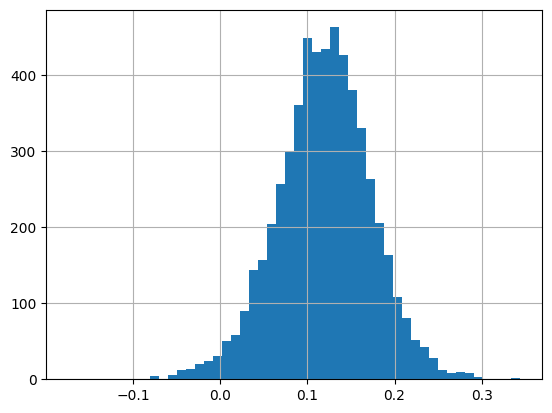

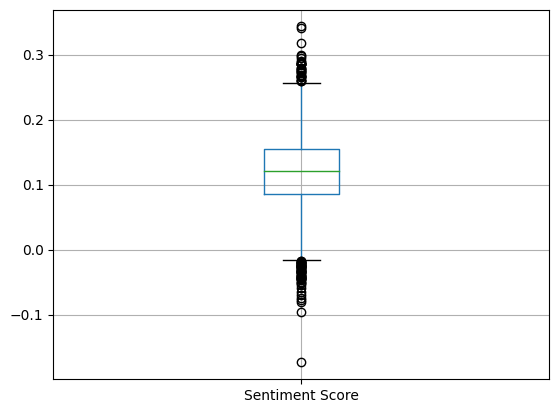

In [ ]:
# finding the optimal threshold for the sentiment score
import matplotlib.pyplot as plt


print(data['Sentiment Score'].describe())

data['Sentiment Score'].hist(bins=50)
plt.show()

data.boxplot(column=['Sentiment Score'])
plt.show()


In [ ]:
# Finding the most popular artists to recommend the users in case they have not rated anyone with a higher score than 7.

# Calculating the average popularity for each artist
artist_popularity = data.groupby('artist')['popularity'].mean().sort_values(ascending=False)

# Getting the top 5 most popular artists
most_popular_artists = artist_popularity.head(5).index.tolist()

most_popular_artists


['børns', 'octavian', 'fosterthepeople', 'harrystyles', 'radiohead']

In [ ]:
# Creating a threshold for a high rating
high_rating_threshold = 7.0

# Default fallback artists - If the similar artists list is too short, or if the user has not given a rating higher than 7 to any artist, we're going to add the most popular artists found earlier
most_popular_artists = ['børns', 'octavian', 'fosterthepeople', 'harrystyles', 'radiohead']

# Create an empty dictionary to store recommendations for each author
recommendations = {}

# Iterating over each author to find their most highly rated artists
for author in data['author'].unique():
    highly_rated_artists = data[(data['author'] == author) & (data['average_score'] > high_rating_threshold) & (data['Sentiment Score'] > 0.154430)]['artist'].unique()


    # Checking first if the author has highly rated artists
    if len(highly_rated_artists) > 0:
        similar_artists = []
        for artist in highly_rated_artists:
            if artist in artist_similarity_df.index:
                # Sorting similar artists based on similarity score and taking the top 5
                top_similar_artists = artist_similarity_df[artist].sort_values(ascending=False).head(6).index.tolist()
                # Removing the artist himself/herself from the list
                top_similar_artists.remove(artist)
                similar_artists.extend(top_similar_artists)

        # Only keeping unique artists and limiting the number to 5
        unique_similar_artists = list(set(similar_artists))[:5]

        # If the similar artists list is too short, or if the user has not given a rating higher than 7 to any artist, we're going to add the most popular artists found earlier
        if len(unique_similar_artists) < 5:
            unique_similar_artists.extend(most_popular_artists)
            unique_similar_artists = unique_similar_artists[:5]

        recommendations[author] = unique_similar_artists
    else:
        # Using the default fallback artists if no highly rated artists are found
        recommendations[author] = most_popular_artists[:5]




In [ ]:
# Testing the output for a random user in the dataset 'Aaron Leitko'

recommendations['Aaron Leitko']

# The output is the top 5 recommended artists



['rokyerickson', 'steveearle', 'davidholmes', 'freedyjohnston', 'snapcase']

 The recommendation system works on a high rating threshold (set at 7 for the score given by the user) and a threshold se at 0.154430 for the sentiment score of the review to identify artists favored by each author. The system then generates recommendations by finding artists similar to those highly rated by the author, using the previously constructed artist similarity matrix and the user profile : The model calculates the similarity between the highly rated artists and other artists in the dataset. This similarity is determined based on a combination of factors, including musical features, sentiment scores, and genre.


A Fallback recommendations to popular artists have been integrated, ensuring that even authors who have not provided a higher rating then 7 . This ensures a balance between tailored suggestions and general popularity.

# Evaluating the recommendation model

- In order to evaluate the model, since there was no test set, we deciced to collect new data through a survey which asked each user to give: the scores given to 5 randomly selected artists and a one-sentence review on each of these artists.




In [ ]:
# Getting the charcteristics of the 5 randomsly selected artists :

data.loc[data['artist'] == '21savage', ['artist', 'author', 'average_score', 'review', 'genre', 'valence',
       'acousticness', 'danceability', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'popularity', 'speechiness', 'Sentiment Score']]


,artist,author,average_score,review,genre,valence,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,popularity,speechiness,Sentiment Score
10,21savage,Paul A. Thompson,7.8,"The jarringly sober track “a lot,” which opens...",Rap,0.410429,0.169184,0.843344,0.496002,0.095922,0.418182,0.134279,0.816943,0.833333,0.272516,0.113089
11,21savage,Sheldon Pearce,6.5,21 Savage skulks through verses like a villain...,Rap,0.410429,0.169184,0.843344,0.496002,0.095922,0.418182,0.134279,0.816943,0.833333,0.272516,0.071631


In [ ]:
data.loc[data['artist'] == 'abba', ['artist', 'author', 'average_score', 'review', 'genre', 'valence',
       'acousticness', 'danceability', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'popularity', 'speechiness', 'Sentiment Score']]


,artist,author,average_score,review,genre,valence,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,popularity,speechiness,Sentiment Score
43,abba,Simon Goddard,8.6,Sid Vicious loved ABBA. Joe Strummer loved ABB...,Pop/R&B,0.796524,0.424698,0.455108,0.925853,0.000003,0.181818,0.232236,0.886472,0.689655,0.048421,0.176997
44,abba,Tom Ewing,8.6,A fifth reissue of a 30-year old album needs s...,Pop/R&B,0.796524,0.424698,0.455108,0.925853,0.000003,0.181818,0.232236,0.886472,0.689655,0.048421,0.171901


In [ ]:
data.loc[data['artist'] == '2chainz', ['artist', 'author', 'average_score', 'review', 'genre', 'valence',
       'acousticness', 'danceability', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'popularity', 'speechiness', 'Sentiment Score']]


,artist,author,average_score,review,genre,valence,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,popularity,speechiness,Sentiment Score
12,2chainz,Briana Younger,7.50,With more and more artists milking their own s...,Rap,0.56291,0.139045,0.802672,0.676728,0.00009,0.5311,0.203955,0.863218,0.701149,0.211596,0.228568
13,2chainz,David Drake,4.50,"At this point, the artist formerly known as Ti...",Rap,0.56291,0.139045,0.802672,0.676728,0.00009,0.5311,0.203955,0.863218,0.701149,0.211596,0.113390
14,2chainz,David Turner,7.20,"2 Chainz is rap’s court jester of the moment, ...",Rap,0.56291,0.139045,0.802672,0.676728,0.00009,0.5311,0.203955,0.863218,0.701149,0.211596,0.164594
15,2chainz,Kyle Kramer,6.20,Quick-hit satisfaction is what makes Atlanta r...,Rap,0.56291,0.139045,0.802672,0.676728,0.00009,0.5311,0.203955,0.863218,0.701149,0.211596,0.095734
16,2chainz,Paul A. Thompson,7.85,The last song on Pretty Girls Like Trap Music ...,Rap,0.56291,0.139045,0.802672,0.676728,0.00009,0.5311,0.203955,0.863218,0.701149,0.211596,0.066005
17,2chainz,Sheldon Pearce,6.90,Much of Atlanta rapper 2 Chainz's appeal comes...,Rap,0.56291,0.139045,0.802672,0.676728,0.00009,0.5311,0.203955,0.863218,0.701149,0.211596,0.105372


In [ ]:
data.loc[data['artist'] == '50cent', ['artist', 'author', 'average_score', 'review', 'genre', 'valence',
       'acousticness', 'danceability', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'popularity', 'speechiness', 'Sentiment Score']]


,artist,author,average_score,review,genre,valence,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,popularity,speechiness,Sentiment Score
21,50cent,Ian Cohen,4.233333,“I even saw when keeping it real...went out of...,"Pop/R&B,Rap",0.620654,0.15822,0.716081,0.697931,0.000829,0.465241,0.146246,0.88234,0.656525,0.280347,0.111793
22,50cent,Julianne Escobedo Shepherd,7.000000,"Last week, on New York's Hot 97 FM, 50 Cent di...","Pop/R&B,Rap",0.620654,0.15822,0.716081,0.697931,0.000829,0.465241,0.146246,0.88234,0.656525,0.280347,0.125001
23,50cent,Ryan Dombal,4.900000,50 Cent is a noted disciple of self-help guru ...,"Pop/R&B,Rap",0.620654,0.15822,0.716081,0.697931,0.000829,0.465241,0.146246,0.88234,0.656525,0.280347,0.079400
24,50cent,Sam Chennault,7.000000,Whether the motivations stem from a Derrideian...,"Pop/R&B,Rap",0.620654,0.15822,0.716081,0.697931,0.000829,0.465241,0.146246,0.88234,0.656525,0.280347,0.127447


Creating a new dataframe with the new users' data and merging it with the artists' characteristics present in our original dataset .

In [ ]:
# Defining the values provided for each artist as dictionaries

values_2chainz = {
    "genre": "Rap",
    "valence": 0.56291,
    "acousticness": 0.139045,
    "danceability": 0.802672,
    "energy": 0.676728,
    "instrumentalness": 0.00009,
    "key": 0.5311,
    "liveness": 0.203955,
    "loudness": 0.863218,
    "popularity": 0.701149,
    "speechiness": 0.211596
}

values_21savage = {
    "genre": "Rap",
    "valence": 0.410429,
    "acousticness": 0.169184,
    "danceability": 0.843344,
    "energy": 0.496002,
    "instrumentalness": 0.095922,
    "key": 0.418182,
    "liveness": 0.134279,
    "loudness": 0.816943,
    "popularity": 0.833333,
    "speechiness": 0.272516
}

values_50cent = {
    "genre": "Pop/R&B,Rap",
    "valence": 0.620654,
    "acousticness": 0.15822,
    "danceability": 0.716081,
    "energy": 0.697931,
    "instrumentalness": 0.000829,
    "key": 0.465241,
    "liveness": 0.146246,
    "loudness": 0.88234,
    "popularity": 0.656525,
    "speechiness": 0.280347
}

values_abba = {
    "genre": "Pop/R&B",
    "valence": 0.796524,
    "acousticness": 0.424698,
    "danceability": 0.455108,
    "energy": 0.925853,
    "instrumentalness": 0.000003,
    "key": 0.181818,
    "liveness": 0.232236,
    "loudness": 0.886472,
    "popularity": 0.689655,
    "speechiness": 0.048421
}

# Creating a dataframe from the extracted reviews
test_df = pd.DataFrame({
    "author": ["Marya", "Rayna", "Abdullah", "Laura", "Marya", "Laura", "Rayna", "Abdullah", "Marya"],
    "artist": ["21savage", "abba", "2chainz", "21savage", "abba", "50cent", "50cent", "abba", "2chainz"],
    "average_score": [9.0, 7.5, 6.0, 8.8, 7.0, 6.0, 8.0, 7.0, 8.7],
    "review": [
        "Bangers always, anything he’s featured on is 10x better",
        "Their catchy tunes and harmonies vocals are timeless, though they sometimes lack the depth found in more contemporary music",
        "never really listened to his music, but he’s a good artist",
        "His lyrics are really good because they tell a story.",
        "also a classic but I listen the mamma mia soundtrack over them any day but they were a 70’s classssiccxx just not my vibe",
        "The beat is ok, he repeats too much his lyrics.",
        "A true icon in the rap genre, combining gritty lyrics with charismatic style that’s both memorable and influential.",
        "Loved the mama mia vibes but other than that I have no clue what they released",
        "ON FUCKING SOME DUCKING BANGERZ raised me in my thot era but idk he’s like the most talented ever"
    ]
})

# Adding the values for each artist to the reviews dataframe
artist_values = {
    "2chainz": values_2chainz,
    "21savage": values_21savage,
    "50cent": values_50cent,
    "abba": values_abba
}

# mapping each function to add each column to the dataframe
for key in values_2chainz.keys():
    test_df[key] = test_df['artist'].map(lambda x: artist_values[x][key] if x in artist_values else None)

test_df


,author,artist,average_score,review,genre,valence,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,popularity,speechiness
0,Marya,21savage,9.0,"Bangers always, anything he’s featured on is 1...",Rap,0.410429,0.169184,0.843344,0.496002,0.095922,0.418182,0.134279,0.816943,0.833333,0.272516
1,Rayna,abba,7.5,Their catchy tunes and harmonies vocals are ti...,Pop/R&B,0.796524,0.424698,0.455108,0.925853,0.000003,0.181818,0.232236,0.886472,0.689655,0.048421
2,Abdullah,2chainz,6.0,"never really listened to his music, but he’s a...",Rap,0.562910,0.139045,0.802672,0.676728,0.000090,0.531100,0.203955,0.863218,0.701149,0.211596
3,Laura,21savage,8.8,His lyrics are really good because they tell a...,Rap,0.410429,0.169184,0.843344,0.496002,0.095922,0.418182,0.134279,0.816943,0.833333,0.272516
4,Marya,abba,7.0,also a classic but I listen the mamma mia soun...,Pop/R&B,0.796524,0.424698,0.455108,0.925853,0.000003,0.181818,0.232236,0.886472,0.689655,0.048421
5,Laura,50cent,6.0,"The beat is ok, he repeats too much his lyrics.","Pop/R&B,Rap",0.620654,0.158220,0.716081,0.697931,0.000829,0.465241,0.146246,0.882340,0.656525,0.280347
6,Rayna,50cent,8.0,"A true icon in the rap genre, combining gritty...","Pop/R&B,Rap",0.620654,0.158220,0.716081,0.697931,0.000829,0.465241,0.146246,0.882340,0.656525,0.280347
7,Abdullah,abba,7.0,Loved the mama mia vibes but other than that I...,Pop/R&B,0.796524,0.424698,0.455108,0.925853,0.000003,0.181818,0.232236,0.886472,0.689655,0.048421
8,Marya,2chainz,8.7,ON FUCKING SOME DUCKING BANGERZ raised me in m...,Rap,0.562910,0.139045,0.802672,0.676728,0.000090,0.531100,0.203955,0.863218,0.701149,0.211596


In [ ]:
# merging the new extracted reviews and scores to the old dataset to be able to generate artist similarity
test_df = pd.concat([data, test_df], ignore_index=True)


In [ ]:
test_df

,artist,author,average_score,review,genre,valence,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,popularity,speechiness,Sentiment Score
0,...andyouwillknowusbythetrailofdead,Ian Cohen,6.80,"So, here we have a record from a group that's ...",Rock,0.242331,0.008443,0.263158,0.857718,0.000367,0.636364,0.526633,0.877735,0.413793,0.073053,0.165487
1,...andyouwillknowusbythetrailofdead,Kevin Adickes,8.60,I feel sorry for bands who have to compete wit...,Rock,0.242331,0.008443,0.263158,0.857718,0.000367,0.636364,0.526633,0.877735,0.413793,0.073053,0.131697
2,...andyouwillknowusbythetrailofdead,Matt LeMay,7.75,In the four years since the release of their m...,Rock,0.242331,0.008443,0.263158,0.857718,0.000367,0.636364,0.526633,0.877735,0.413793,0.073053,0.149849
3,...andyouwillknowusbythetrailofdead,Nick Sylvester,4.00,Did Source Tags & Codes deserve a 10.0? That's...,Rock,0.242331,0.008443,0.263158,0.857718,0.000367,0.636364,0.526633,0.877735,0.413793,0.073053,0.021198
4,...andyouwillknowusbythetrailofdead,Paul Thompson,7.20,"Tao of the Dead, the seventh LP from embattled...",Rock,0.242331,0.008443,0.263158,0.857718,0.000367,0.636364,0.526633,0.877735,0.413793,0.073053,0.084421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5637,abba,Marya,7.00,also a classic but I listen the mamma mia soun...,Pop/R&B,0.796524,0.424698,0.455108,0.925853,0.000003,0.181818,0.232236,0.886472,0.689655,0.048421,NaN
5638,50cent,Laura,6.00,"The beat is ok, he repeats too much his lyrics.","Pop/R&B,Rap",0.620654,0.158220,0.716081,0.697931,0.000829,0.465241,0.146246,0.882340,0.656525,0.280347,NaN
5639,50cent,Rayna,8.00,"A true icon in the rap genre, combining gritty...","Pop/R&B,Rap",0.620654,0.158220,0.716081,0.697931,0.000829,0.465241,0.146246,0.882340,0.656525,0.280347,NaN
5640,abba,Abdullah,7.00,Loved the mama mia vibes but other than that I...,Pop/R&B,0.796524,0.424698,0.455108,0.925853,0.000003,0.181818,0.232236,0.886472,0.689655,0.048421,NaN


# Evaluating the model on the new data

In [ ]:
# computing the sentiment score for the new users

from textblob import TextBlob
import numpy as np

def calculate_sentiment(text):
    sentiment = TextBlob(text).sentiment # using the TextBlob library
    return sentiment.polarity

sentiment_scores = test_df['review'].apply(calculate_sentiment)

# Creating a new column "sentiment score" to be used later for the model.
test_df['Sentiment Score'] = sentiment_scores

test_df.reset_index(drop=True, inplace=True)
test_df

## Creating user profile

# Converting all the relevant columns to be included in profile to numeric types
numeric_columns = [
    'valence',
       'acousticness', 'danceability', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'popularity', 'speechiness']


# dealing with 'errors='coerce' to convert non-numeric values to NaN and then fill them with 0
test_df[numeric_columns] = test_df[numeric_columns].apply(pd.to_numeric, errors='coerce').fillna(0)

# Aggregating the columns by author
author_profiles = test_df.groupby('author').agg({
    'Sentiment Score': 'mean',
    'average_score': 'mean',
    'genre': lambda x: x.mode()[0],  # for 'genre' -> finding the most frequent genre for each author since the variable is categorical
    'danceability': 'mean',
    'energy': 'mean',
    'key': 'mean',
    'loudness': 'mean',
    'speechiness': 'mean',
    'acousticness': 'mean',
    'instrumentalness': 'mean',
    'liveness': 'mean',
    'valence': 'mean',
}).reset_index()

author_profiles.head()



## artist similarity

# Standardizing the artist features separately
artist_scaler = StandardScaler()

# Re-aggregating artist data
artist_data = test_df.groupby('artist').mean()[numeric_columns].reset_index()
artist_features_scaled = artist_scaler.fit_transform(artist_data[numeric_columns])

# Calculating cosine similarity among artists
artist_similarity = cosine_similarity(artist_features_scaled)

# Converting the similarity matrix to a DataFrame for better readability
artist_similarity_df = pd.DataFrame(
    artist_similarity,
    index=artist_data['artist'],
    columns=artist_data['artist']
)

artist_similarity_df.head(20)


<ipython-input-24-77e886f23794>:56: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  artist_data = test_df.groupby('artist').mean()[numeric_columns].reset_index()


artist,...andyouwillknowusbythetrailofdead,03greedo,13thfloorelevators,21savage,2chainz,2ne1,2pac,50cent,6ix9ine,6lack,...,yunglean,yuno,z-ro,zayn,zedd,zero7,zeroboys,zhu,zztop,ólafurarnalds
artist,,,,,,,,,,,,,,,,,,,,,
...andyouwillknowusbythetrailofdead,1.000000,-0.371104,-0.047453,-0.514411,-0.222556,-0.400424,-0.127777,-0.200300,-0.297082,-0.418014,...,0.429691,-0.056856,0.431452,-0.085712,-0.129758,-0.166628,0.609045,-0.208428,-0.236347,-0.276454
03greedo,-0.371104,1.000000,0.001429,0.474779,0.345949,0.833628,0.116374,0.216293,0.574153,0.244943,...,0.309440,0.236555,0.008555,0.502537,0.758716,0.167102,-0.493891,0.617263,-0.482307,-0.105649
13thfloorelevators,-0.047453,0.001429,1.000000,-0.392048,-0.158425,0.407725,0.052821,0.085226,-0.095873,-0.650446,...,-0.191749,0.128495,-0.125704,-0.627770,-0.186807,-0.255183,0.265950,-0.243067,0.166517,-0.182153
21savage,-0.514411,0.474779,-0.392048,1.000000,0.796234,0.329141,0.610697,0.693707,0.872660,0.628845,...,0.039675,-0.096852,0.402384,0.375196,0.377951,-0.181747,-0.306799,0.475888,-0.296650,-0.061613
2chainz,-0.222556,0.345949,-0.158425,0.796234,1.000000,0.460966,0.942190,0.884717,0.843828,0.175184,...,0.100946,-0.435655,0.735223,0.076462,0.411154,-0.689263,0.030749,0.552602,-0.285169,-0.566281
2ne1,-0.400424,0.833628,0.407725,0.329141,0.460966,1.000000,0.376643,0.385023,0.555064,-0.129476,...,0.195948,0.018039,0.105696,0.094694,0.664923,-0.232808,-0.255193,0.555100,-0.256553,-0.347184
2pac,-0.127777,0.116374,0.052821,0.610697,0.942190,0.376643,1.000000,0.902379,0.718295,-0.051873,...,0.016937,-0.548056,0.758227,-0.205805,0.185149,-0.859932,0.179581,0.358504,-0.171235,-0.687946
50cent,-0.200300,0.216293,0.085226,0.693707,0.884717,0.385023,0.902379,1.000000,0.844432,0.207172,...,-0.123691,-0.438964,0.665229,-0.110626,0.230291,-0.767661,0.062315,0.223546,-0.342426,-0.555677
6ix9ine,-0.297082,0.574153,-0.095873,0.872660,0.843828,0.555064,0.718295,0.844432,1.000000,0.428953,...,0.208858,-0.184784,0.569958,0.238637,0.477934,-0.430197,-0.190106,0.385538,-0.507637,-0.320120


In [ ]:
# Creating a threshold for a high rating
high_rating_threshold = 7.0

# Default fallback artists - can be popular or random artists
most_popular_artists = ['børns', 'octavian', 'fosterthepeople', 'harrystyles', 'radiohead']
# Create an empty dictionary to store recommendations for each author
recommendations = {}

# Iterating over each author to find their most highly rated artists
for author in test_df['author'].unique():
    highly_rated_artists = test_df[(test_df['author'] == author) & (test_df['average_score'] > high_rating_threshold) & (test_df['Sentiment Score'] > 0.154430)]['artist'].unique()

    # Check if the author has highly rated artists
    if len(highly_rated_artists) > 0:
        similar_artists = []
        for artist in highly_rated_artists:
            if artist in artist_similarity_df.index:
                # Sorting similar artists based on similarity score and taking top 5
                top_similar_artists = artist_similarity_df[artist].sort_values(ascending=False).head(6).index.tolist()
                # Removing the artist itself from the list
                top_similar_artists.remove(artist)
                similar_artists.extend(top_similar_artists)

        # Only keeping unique artists and limiting the number to 5
        unique_similar_artists = list(set(similar_artists))[:5]

        # If the similar artists list is too short, or if the user has not given a rating higher than 7 to any artist, we're going to add the most popular artists found earlier
        if len(unique_similar_artists) < 5:
            unique_similar_artists.extend(most_popular_artists)
            unique_similar_artists = unique_similar_artists[:5]

        recommendations[author] = unique_similar_artists
    else:
        # Use default fallback artists if no highly rated artists are found
        recommendations[author] = most_popular_artists[:5]






Priniting the recommendations for the new users

In [ ]:
print(recommendations['Marya'])


['lilyachty', 'lilbaby', 'richthekid', 'jayrock', 'cardib']


In [ ]:
print(recommendations['Abdullah'])
print(recommendations['Rayna'])
print(recommendations['Laura'])

['børns', 'octavian', 'fosterthepeople', 'harrystyles', 'radiohead']
['youngboyneverbrokeagain', 'fabolous', 'mikejones', 'bubbasparxxx', 'klaxons']
['lilbaby', 'richthekid', 'cardib', 'gunna', 'kaytranada']


These recommendations were afterward sent to each user which were asked to judge the accuracy of these reccommendations -> leading to the following results:

- Marya Mufti : 4/5
- Abdullah Abdullah Ghosheh: 5/5
- Laura Moya : 3/5
- Rayna Solanki: 4/5

Which could be translated into an approximate accuracy of 80% on 4 tests.